# Stroop Effect

[Project Instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True), [Project Rubics](https://review.udacity.com/#!/rubrics/71/view)

## Question 1. Identify variables in the experiment

- **Independent variable**: Word color congruency conditions (congruent and incongruent)
- **Dependent variable**: Time taken for each individual to name the ink color


## Quesiton 2a. Establish hypothesis

* **μ<sub>c</sub>** = congruent population mean
* **μ<sub>i</sub>** = incongruent population mean

H<sub>0</sub>: μ<sub>c</sub> - μ<sub>i</sub> = 0
* Null hypothesis: there’s NO difference in time taken between congruent and incongruent means in the population.

H<sub>a</sub>: μ<sub>c</sub> - μ<sub>i</sub> ≠ 0
* Alternative hypothesis: there IS a difference in time taken between congruent and incongruent means in the population.


## Question 2b: Establish a statistical test

||Assumptions|
|:---|:---|
|1|Interval or ratio scale of measurement, approximately interval (Scales of measurement)|
|2|Random sampling from a defined population (Experimental design, or Research design)|
|3|Samples or sets of data used to produce the difference scores are linked in the population through repeated measurement, natural association, or matching (Research design)|
|4|Scores are normally distributed in the population; difference scores are normally distributed (Based on Central Limit Theorem)|

Since I have no idea about population (unknown population parameters), I will perform **one-sample t-test**, to see if the alternative hypothesis reject or fail to reject the null hypothesis.

The test is a **dependent test**, since it's tha same subject that being assigned two conditions in random order (within-subject design):
* But the carry-over effects among dependent variables are neglect-able. Because each visual cognitive task your mind performs is independent, and it won’t train your mind everytime you do the task, based on [this article](http://scienceblogs.com/developingintelligence/2008/07/07/failures-in-cognitive-training/).

And based on the alternative hypothesis, we should conduct `two-tailed test` for this hypothesis testing. The `α level` to prove `statistical significance` is 0.05, which means `P-value` of critical regions in both -/+ directions is 0.025.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_file = 'stroopdata.csv'

dataFrame = pd.read_csv(data_file)
dataFrame

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [3]:
# Get the sample size from data:
congruent_n = len(dataFrame['Congruent'])
incongruent_n = len(dataFrame['Incongruent'])

## Question 3: Report descriptive statistics


In [4]:
# Descriptive statistics of congruent participants sample
dataFrame['Congruent'].describe()

count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64

In [5]:
congruent_sample_mean = dataFrame['Congruent'].mean()
congruent_sample_sd = dataFrame['Congruent'].std()

print("Congruent Sample: MEAN = "+
str(round(congruent_sample_mean,2))+", SD = "+str(round(congruent_sample_sd,2))
)

# See if there's any outliers in this sample data
congruent_sample_iqr = dataFrame['Congruent'].quantile(.75) - dataFrame['Congruent'].quantile(.25)
congruent_sample_outlier_upper = dataFrame['Congruent'].quantile(.75) + 1.5*congruent_sample_iqr
congruent_sample_outlier_lower = dataFrame['Congruent'].quantile(.25) - 1.5*congruent_sample_iqr

if dataFrame['Congruent'].max() < congruent_sample_outlier_upper:
    if dataFrame['Congruent'].min() > congruent_sample_outlier_lower:
        print("There's no outlier in this sample.")
    else:
        print("There're outliers in this sample since the minimum in the sample is smaller than the lower bound of outlier.")
else:
    if dataFrame['Congruent'].min() < congruent_sample_outlier_lower:
        print("There're outliers in this sample since the minimum in the sample is smaller than the lower bound of outlier, and the maximum in the sample is larger than the upper bound of outlier.")
    else:
        print("There're outliers in this sample since the maximum in the sample is larger than the upper bound of outlier.")

Congruent Sample: MEAN = 14.05, SD = 3.56
There's no outlier in this sample.


In [6]:
# Descriptive statistics of incongruent participants sample
dataFrame['Incongruent'].describe()

count    24.000000
mean     22.015917
std       4.797057
min      15.687000
25%      18.716750
50%      21.017500
75%      24.051500
max      35.255000
Name: Incongruent, dtype: float64

In [7]:
incongruent_sample_mean = dataFrame['Incongruent'].mean()
incongruent_sample_sd = dataFrame['Incongruent'].std()

print("Incongruent Sample: MEAN = "+
str(round(incongruent_sample_mean,2))+", SD = "+str(round(incongruent_sample_sd,2))
)

# See if there's any outliers in this sample data
incongruent_sample_iqr = dataFrame['Incongruent'].quantile(.75) - dataFrame['Incongruent'].quantile(.25)
incongruent_sample_outlier_upper = dataFrame['Incongruent'].quantile(.75) + 1.5*incongruent_sample_iqr
incongruent_sample_outlier_lower = dataFrame['Incongruent'].quantile(.25) - 1.5*incongruent_sample_iqr

if dataFrame['Incongruent'].max() < incongruent_sample_outlier_upper:
    if dataFrame['Incongruent'].min() > incongruent_sample_outlier_lower:
        print("There's no outlier in this sample.")
    else:
        print("There're outliers in this sample since the minimum in the sample is smaller than the lower bound of outlier.")
else:
    if dataFrame['Incongruent'].min() < incongruent_sample_outlier_lower:
        print("There're outliers in this sample since the minimum in the sample is smaller than the lower bound of outlier, and the maximum in the sample is larger than the upper bound of outlier.")
    else:
        print("There're outliers in this sample since the maximum in the sample is larger than the upper bound of outlier.")

Incongruent Sample: MEAN = 22.02, SD = 4.8
There're outliers in this sample since the maximum in the sample is larger than the upper bound of outlier.


Based on results above:
* The average time for participants sample take to name under congruent words condition was 14.05 (*SD* = 3.56).
* The average time for participants sample take to name under incongruent words condition was 22.02 (*SD* = 4.80).

(Though there're outliers in the 'Incongruent' sample data, I think it's acceptible to ignore it for now, and not being distracted by its existence. Because the maximum number of the sample is not ridiculous large.)

### Compute mean and sd of sample difference

Since in our hypothesis, we focus on the difference between congruent population mean and incongruent population mean. 

By subtracting congruent sample group from incongruent sample group, we get a new data set, which is the **distribution of differences** between congruent samples and incongruent samples. We can compute the mean and the standard deviation of this new data set.

With this new data set about independent sample of differences, we will analyze it.

In [8]:
# Work out the difference for each dependent sample under congruent and incongruent samples
difference_sample = dataFrame['Congruent'] - dataFrame['Incongruent']

print("Sample of Difference: MEAN = "+
str(round(difference_sample.mean(),2))+", SD = "+str(round(difference_sample.std(),2))
)

Sample of Difference: MEAN = -7.96, SD = 4.86


Based on this result clearly indicated (`point estimate` for the differences), I might expect that generally, people spend more time in reading incongruent words, compared to congruent words.

## Question 4: Plot the data

In [9]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
## agg backend is used to create plot as a .png file
mpl.use('agg')

data_to_plot = [dataFrame['Congruent'], dataFrame['Incongruent']]
print data_to_plot

[0     12.079
1     16.791
2      9.564
3      8.630
4     14.669
5     12.238
6     14.692
7      8.987
8      9.401
9     14.480
10    22.328
11    15.298
12    15.073
13    16.929
14    18.200
15    12.130
16    18.495
17    10.639
18    11.344
19    12.369
20    12.944
21    14.233
22    19.710
23    16.004
Name: Congruent, dtype: float64, 0     19.278
1     18.741
2     21.214
3     15.687
4     22.803
5     20.878
6     24.572
7     17.394
8     20.762
9     26.282
10    24.524
11    18.644
12    17.510
13    20.330
14    35.255
15    22.158
16    25.139
17    20.429
18    17.425
19    34.288
20    23.894
21    17.960
22    22.058
23    21.157
Name: Incongruent, dtype: float64]


/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


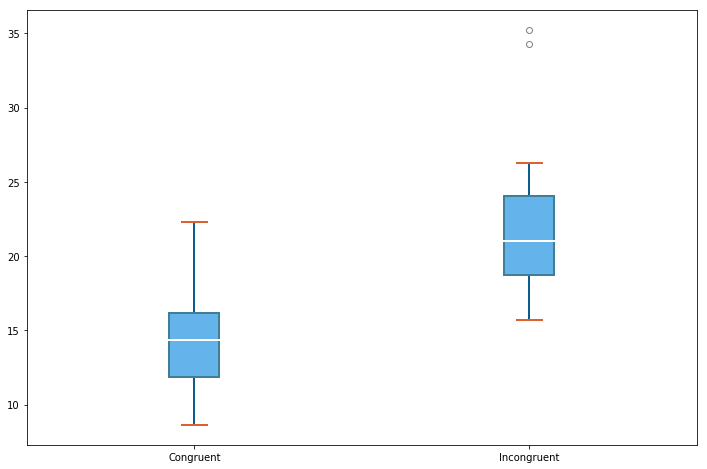

In [11]:
# Create a figure instance
fig = plt.figure(1, figsize=(12, 8))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
# bp = ax.boxplot(data_to_plot)

## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#407E95', linewidth=2)
    # change fill color
    box.set( facecolor = '#64B4EB' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#0B5B91', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#DF602E', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#ffffff', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

#plt.yticks(np.arange(0, 42, 2.0))

## Custom x-axis labels
ax.set_xticklabels(['Congruent', 'Incongruent'])

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

We obviously can see incongruent box are right above those congruent box generally. That means, it's likely that stroop effect DOES make a difference in human visual cognition.

## Question 5: Perform the statistical test and interpret your results

### Compute critical statistic value:
1. First, compute `Degree of freedom` ↓
2. Then, find out what `t-critical value` is under this hypothesis test ↓
3. Compute `sample standard deviation` with the difference for each dependent sample under congruent and incongruent samples ↓
4. Then, compute `Standard error of mean` with `sample standard deviation` ↓
5. Finally, we get our `t-statistic` with difference between two sample means, which divided by `standard error of mean`.

In [12]:
# Compute degree of freedom by n-1
difference_sample_df = len(difference_sample)-1

print("Degree of freedome of sample is " + str(difference_sample_df))

Degree of freedome of sample is 23


In [13]:
# Based on degree of freedom and α level
# Get t-critical value from http://www.graphpad.com/quickcalcs/statRatio2/
t_critical_positive = 2.0687
t_critical_negative = -2.0687

print("t-critical value for a two-tailed test with α=0.05 is " + "±" + str(t_critical_positive))

t-critical value for a two-tailed test with α=0.05 is ±2.0687


In [14]:
# Since we have the difference sample, we can work out the new sample standard deviation
# and compute standard error
sample_se = difference_sample.std() / sqrt(len(difference_sample))

print("The standard error of samples is " + str(round(sample_se,2)))

The standard error of samples is 0.99


In [15]:
# Get t-statistic with difference mean, which divided by standard error
t_statistic = difference_sample.mean()/sample_se

print("The t-statistic is " + str(round(t_statistic,3)))

The t-statistic is -8.021


### Compute confidence interval:
1. First of all, based on `α level` and test we conduct, we can get `t-critical value` ↓
2. Secondly, compute `Margin of error` with `t-critical value` and `standard error` ↓
3. Finally, get `Confidence Interval` with `sample mean difference ± Margin of error`.

In [16]:
# Compute confidence interval
margin_of_error = t_critical_positive * sample_se

ci_lower = difference_sample.mean() - margin_of_error
ci_upper = difference_sample.mean() + margin_of_error

print("95% Confidence interval is ("+str(round(ci_lower,2))+", "+str(round(ci_upper,2))+")")

95% Confidence interval is (-10.02, -5.91)


### Conclusions

Now we have `t-statistic` (which is `-8.021`), and `t-critical values` (which is `±2.0687`). Since `-8.021` falls below `-2.0687` (take negative direction), therefore my statistical decision is:

* **Reject the null hypothesis**

It appears that average time for participants sample take to name under incongruent words condition are *significantly* different from samples under congruent words condition, at a significant level of .05. This result match my expectation as stated above, when computing sample mean difference.

## Question 6: Digging deeper and extending the investigation

Before we extend the investigation, we need dig deeper into our current experiment, finding more perspectives to look at the result. We need to measure the size of a treatment effect that we observed.

### Measure r-squared of above experiment

**r<sup>2</sup>** tells you the proportion of the difference in time people take name words can be attributed to congruent or incongruent words.

In [17]:
# Compute r-squared
r_squared = (t_statistic**2) / (t_statistic**2 + (difference_sample_df))

print("{0:.0f}%".format(r_squared * 100) + " of the difference in time people take name words can be explained by the character of whether the word is congruent or incongruent." )

74% of the difference in time people take name words can be explained by the character of whether the word is congruent or incongruent.


74% is actually quite a big number. So word color congruency condition does explain a lot about the difference.

### Extend the investigation

Experiment Design
* Dependent samples experiment → independent samples experiment, to minimize carry-over effect.
* Add another controlled group for comparisons. The group will only name *pure black* words.

Samples
* Samples should be representative.
* The sample size of each group should go bigger, to 31, in order to achieve more accurate and unbiased results.

Controlled Group
* Find out factors that might influence results: age, job, education...
* Randomize how we divide into different groups.